In [44]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # some plotting!
import seaborn as sns # so pretty!
from scipy import stats # I might use this
from sklearn.ensemble import RandomForestClassifier # checking if this is available
from sklearn.model_selection import train_test_split
# from sklearn import cross_validation
%matplotlib inline

In [97]:
data = pd.read_csv('./Final_Data.csv')
data = data.dropna()

In [98]:
# X = data.loc[:, data.columns != 'Set Point']
# y = data.loc[:, data.columns == 'Set Point']

In [99]:
from sklearn import metrics
data_train, data_test = train_test_split(data, test_size=0.2, random_state=0)

In [100]:
# import the training data set and make sure it's in correctly...
train = data_train
#train_original = data_train
test = data_test
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7526 entries, 4164 to 2732
Data columns (total 17 columns):
Min Humidity                  7526 non-null int64
Max Humidity                  7526 non-null int64
IR1 Duration                  7526 non-null int64
IR1 DI Duration               7526 non-null int64
SetPoint Temp                 7526 non-null int64
Max Temp                      7526 non-null int64
Min Temp                      7526 non-null int64
IR1 DI status change count    7526 non-null int64
IR1 DI status                 7526 non-null int64
IR1 Manual Status             7526 non-null int64
Set Point                     7526 non-null int64
Saving                        7526 non-null float64
Day                           7526 non-null int64
Outside Temp                  7526 non-null float64
OutSite_Humidity              7526 non-null int64
Sec                           7526 non-null int64
Feedback                      7526 non-null int64
dtypes: float64(2), int64(15)
memory

In [101]:
print(len(test))

1882


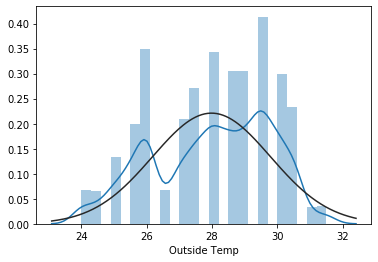

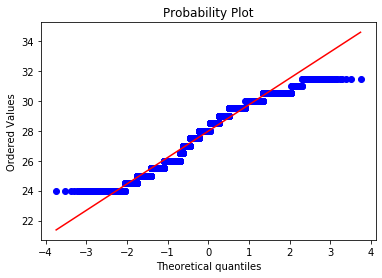

In [102]:
from scipy.stats import norm
#histogramt.shape
sns.distplot(train['Outside Temp'],fit=norm);
fig = plt.figure()
#histogram
res = stats.probplot(train['Outside Temp'], plot=plt)

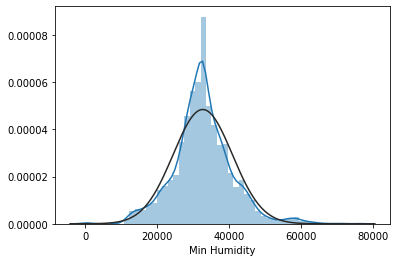

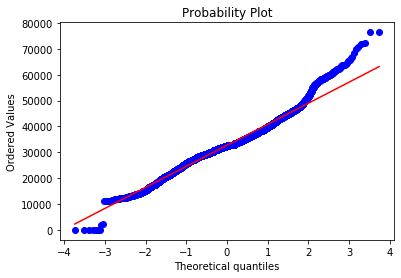

In [103]:
from scipy.stats import norm
sns.distplot(train['Min Humidity'],fit=norm);
fig = plt.figure()
res = stats.probplot(train['Min Humidity'], plot=plt)

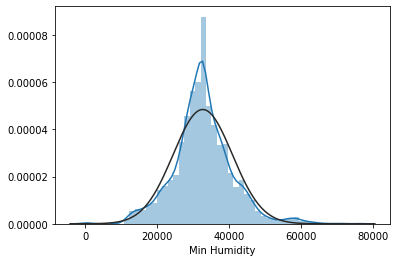

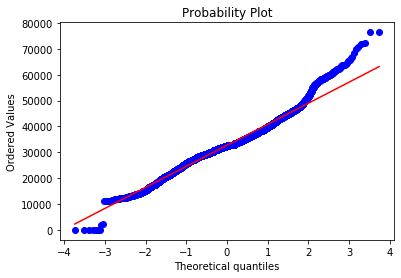

In [104]:
from scipy.stats import norm
sns.distplot(train['Min Humidity'],fit=norm);
fig = plt.figure()
res = stats.probplot(train['Min Humidity'], plot=plt)

In [105]:
#log transform
# train['Outside Temp'] = np.log(train['SetPoint Temp'])
# sns.distplot(train['SetPoint Temp'],fit=norm);
# fig = plt.figure()
# res = stats.probplot(train['Outside Temp'], plot=plt)

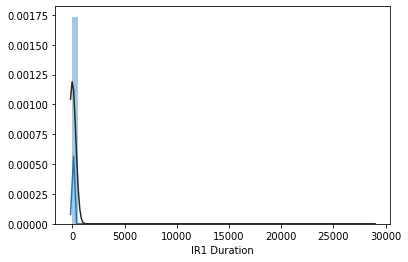

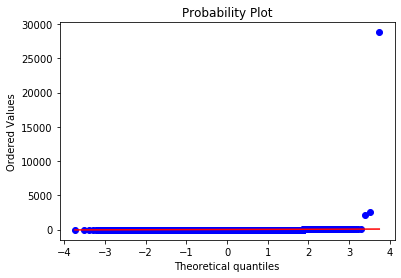

In [106]:
from scipy.stats import norm
sns.distplot(train['IR1 Duration'],fit=norm);
fig = plt.figure()
res = stats.probplot(train['IR1 Duration'], plot=plt)

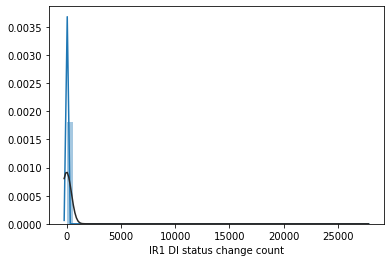

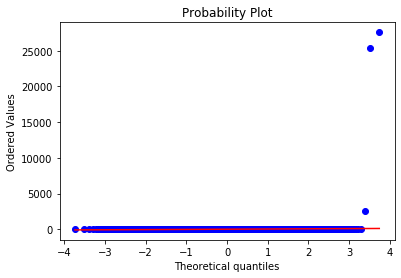

In [107]:
from scipy.stats import norm
sns.distplot(train['IR1 DI status change count'],fit=norm);
fig = plt.figure()
res = stats.probplot(train['IR1 DI status change count'], plot=plt)

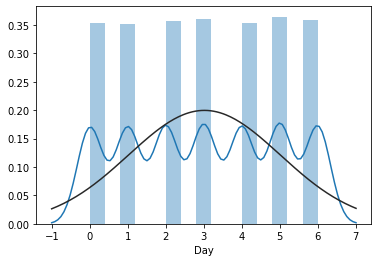

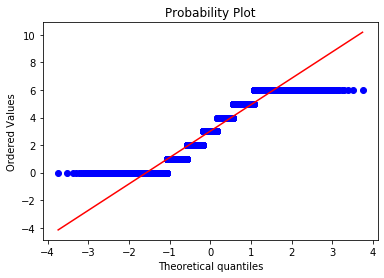

In [108]:
from scipy.stats import norm
sns.distplot(train['Day'],fit=norm);
fig = plt.figure()
res = stats.probplot(train['Day'], plot=plt)

In [109]:
print(data.columns.tolist)

<bound method IndexOpsMixin.tolist of Index(['Min Humidity', 'Max Humidity', 'IR1 Duration', 'IR1 DI Duration',
       'SetPoint Temp', 'Max Temp', 'Min Temp', 'IR1 DI status change count',
       'IR1 DI status', 'IR1 Manual Status', 'Set Point', 'Saving', 'Day',
       'Outside Temp', 'OutSite_Humidity', 'Sec', 'Feedback'],
      dtype='object')>


In [110]:
from sklearn.tree import DecisionTreeRegressor as dtr
# define the training data X...
X = data_train[['Min Humidity', 'Max Humidity', 'IR1 Duration', 'IR1 DI Duration',
       'SetPoint Temp', 'Max Temp', 'Min Temp', 'IR1 DI status change count',
       'IR1 DI status', 'IR1 Manual Status','Saving', 'Day',
       'Outside Temp', 'OutSite_Humidity', 'Sec', 'Feedback']]
Y = data_train[['Set Point']]
# and the data for the competition submission...
X_test = data_test
print(X.head())
print(Y.head())

      Min Humidity  Max Humidity  IR1 Duration  IR1 DI Duration  \
4164         35100         45000             0                0   
1690         36900         37100             0                0   
6688         33100         55100             0                0   
3673         31400         31600             0                0   
6608         32800         34900             0                0   

      SetPoint Temp  Max Temp  Min Temp  IR1 DI status change count  \
4164              0     23100     20400                           0   
1690              0     31700     31600                       27600   
6688              0     24500     22500                           0   
3673              0     31100     31000                           0   
6608              0     28200     27000                           0   

      IR1 DI status  IR1 Manual Status  Saving  Day  Outside Temp  \
4164              0               2500    15.2    4          26.5   
1690              0             

In [111]:
# let's set up some cross-validation analysis to evaluate our model and later models...
from sklearn.model_selection import cross_val_score
# try fitting a decision tree regression model...
DTR_1 = dtr(max_depth=None) # declare the regression model form. Let the depth be default.
DTR_1.fit(X,Y) # fit the training data
scores_dtr = cross_val_score(DTR_1, X, Y, cv=10,scoring='explained_variance') # 10-fold cross validation
print('scores for k=10 fold validation:',scores_dtr)
print("Est. explained variance: %0.2f (+/- %0.2f)" % (scores_dtr.mean(), scores_dtr.std() * 2))

scores for k=10 fold validation: [0.80007138 0.95996097 0.83527407 0.79917886 0.97393301 0.86032652
 0.81454914 0.87576677 0.93101211 0.93430788]
Est. explained variance: 0.88 (+/- 0.13)


In [112]:
from sklearn.ensemble import RandomForestRegressor as rfr
estimators = [2, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
mean_rfrs = []
std_rfrs_upper = []
std_rfrs_lower = []
yt = [i for i in Y['Set Point']] # quick pre-processing of the target
np.random.seed(11111)
for i in estimators:
    model = rfr(n_estimators=i,max_depth=None)
    #model.fit(X,y)
    scores_rfr = cross_val_score(model,X,yt,cv=7,scoring='explained_variance')
    print('estimators:',i)
#     print('explained variance scores for k=10 fold validation:',scores_rfr)
    print("Est. explained variance: %0.2f (+/- %0.2f)" % (scores_rfr.mean(), scores_rfr.std() * 2))
    print('')
    mean_rfrs.append(scores_rfr.mean())
    std_rfrs_upper.append(scores_rfr.mean()+scores_rfr.std()*2) # for error plotting
    std_rfrs_lower.append(scores_rfr.mean()-scores_rfr.std()*2) # for error plotting

estimators: 2
Est. explained variance: 0.85 (+/- 0.06)

estimators: 5
Est. explained variance: 0.90 (+/- 0.05)

estimators: 10
Est. explained variance: 0.91 (+/- 0.05)

estimators: 15
Est. explained variance: 0.91 (+/- 0.04)

estimators: 20
Est. explained variance: 0.91 (+/- 0.05)

estimators: 25
Est. explained variance: 0.91 (+/- 0.06)

estimators: 30
Est. explained variance: 0.91 (+/- 0.05)

estimators: 35
Est. explained variance: 0.92 (+/- 0.06)

estimators: 40
Est. explained variance: 0.91 (+/- 0.05)

estimators: 45
Est. explained variance: 0.92 (+/- 0.05)

estimators: 50
Est. explained variance: 0.92 (+/- 0.05)

estimators: 55
Est. explained variance: 0.91 (+/- 0.05)

estimators: 60
Est. explained variance: 0.92 (+/- 0.05)

estimators: 65
Est. explained variance: 0.92 (+/- 0.06)

estimators: 70
Est. explained variance: 0.92 (+/- 0.05)

estimators: 75
Est. explained variance: 0.92 (+/- 0.05)

estimators: 80
Est. explained variance: 0.92 (+/- 0.05)



In [113]:
included_features = ['Min Humidity', 'Max Humidity', 'IR1 Duration', 'IR1 DI Duration',
       'SetPoint Temp', 'Max Temp', 'Min Temp', 'IR1 DI status change count',
       'IR1 DI status', 'IR1 Manual Status','Saving', 'Day',
       'Outside Temp', 'OutSite_Humidity', 'Sec', 'Feedback']

import sklearn.feature_selection as fs
mir_result = fs.mutual_info_regression(X, yt) # mutual information regression feature ordering
feature_scores = []
for i in np.arange(len(included_features)):
    feature_scores.append([included_features[i],mir_result[i]])
sorted_scores = sorted(np.array(feature_scores), key=lambda s: float(s[1]), reverse=True) 
print(np.array(sorted_scores))

[['Outside Temp' '0.2323003523204994']
 ['Saving' '0.1287186497532815']
 ['Max Temp' '0.0952463287825811']
 ['Min Temp' '0.07240343057608634']
 ['OutSite_Humidity' '0.06403350253632212']
 ['Max Humidity' '0.05349475813651505']
 ['Min Humidity' '0.04757473656490152']
 ['Day' '0.04210246541618723']
 ['Feedback' '0.022265830632539618']
 ['IR1 DI status change count' '0.009558664729491184']
 ['IR1 Duration' '0.004707390180446858']
 ['IR1 DI Duration' '0.0012773088269182331']
 ['SetPoint Temp' '0.0']
 ['IR1 DI status' '0.0']
 ['IR1 Manual Status' '0.0']
 ['Sec' '0.0']]


In [114]:
# data_1 = pd.read_csv('/home/floura/Desktop/ML/stratahive/Energos/atm/df_atm.csv')
# data_1 = data_1.dropna()

In [115]:
# print(data_1.columns.tolist)
# #data_1.head()

In [116]:
# # X = data_train[included_features]
# # Y = data_train[['Set Point']]
# X = data_1.loc[:, data_1.columns != 'changed_value']
# y = data_1.loc[:, data_1.columns == 'changed_value']

In [117]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [118]:
# print(X_train.shape)
# print(y_train.shape)

In [119]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import r2_score

# regr = RandomForestRegressor(max_depth=None, random_state=0, n_estimators=80)
# regr.fit(X_train, y_train)
# y_pred = regr.predict(X_test)
# print('Variance score: %.2f' % r2_score(y_test, y_pred))

In [120]:
# print(regr.feature_importances_)
# print(X_train.columns.tolist)

In [121]:
def getModel(sorted_scores,train,numFeatures):
    included_features = np.array(sorted_scores)[:,0][:numFeatures] # ordered list of important features
    # define the training data X...
    X = train[included_features]
    Y = train[['Set Point']]
    # transform categorical data if included in X...
    for col in list(X):
        if X[col].dtype=='object':
            X = getObjectFeature(X, col)
    # define the number of estimators to consider
    estimators = [2, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
    mean_rfrs = []
    std_rfrs_upper = []
    std_rfrs_lower = []
    yt = [i for i in Y['Set Point']]
    np.random.seed(11111)
    # for each number of estimators, fit the model and find the results for 8-fold cross validation
    for i in estimators:
        model = rfr(n_estimators=i,max_depth=None)
        scores_rfr = cross_val_score(model,X,yt,cv=10,scoring='explained_variance')
        mean_rfrs.append(scores_rfr.mean())
        std_rfrs_upper.append(scores_rfr.mean()+scores_rfr.std()*2) # for error plotting
        std_rfrs_lower.append(scores_rfr.mean()-scores_rfr.std()*2) # for error plotting
    return mean_rfrs,std_rfrs_upper,std_rfrs_lower

# define a function to plot the model expected variance results...
def plotResults(mean_rfrs,std_rfrs_upper,std_rfrs_lower,numFeatures):
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111)
    ax.plot(estimators,mean_rfrs,marker='o',
           linewidth=4,markersize=12)
    ax.fill_between(estimators,std_rfrs_lower,std_rfrs_upper,
                    facecolor='green',alpha=0.3,interpolate=True)
    ax.set_ylim([-.2,1])
    ax.set_xlim([0,80])
    plt.title('Expected Variance of Random Forest Regressor: Top %d Features'%numFeatures)
    plt.ylabel('Expected Variance')
    plt.xlabel('Trees in Forest')
    plt.grid()
    plt.show()
    return

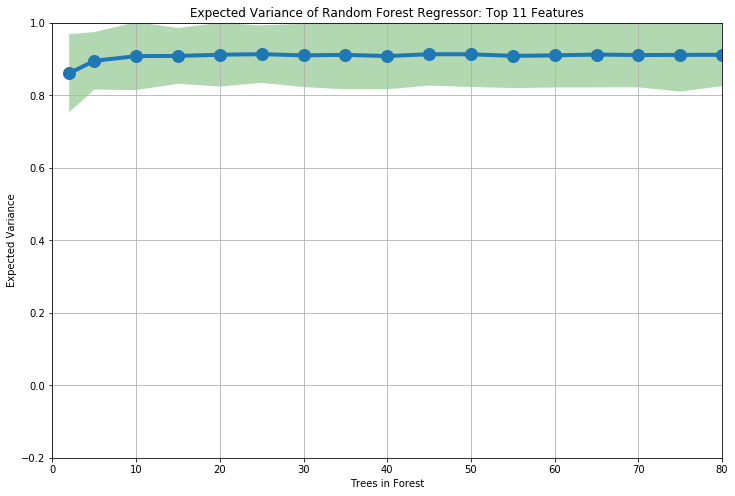

In [122]:
# top 15...
mean_rfrs,std_rfrs_upper,std_rfrs_lower = getModel(sorted_scores,train,11)
plotResults(mean_rfrs,std_rfrs_upper,std_rfrs_lower,11)

In [132]:
#fitting the model
numFeatures = 11 # the number of features to inlcude
trees = 60 # trees in the forest
included_features = np.array(sorted_scores)[:,0][:numFeatures]
# define the training data X...
X = train[included_features]
Y = train[['Set Point']]
# transform categorical data if included in X...
for col in list(X):
    if X[col].dtype=='object':
        X = getObjectFeature(X, col)
yt = [i for i in Y['Set Point']]
np.random.seed(11111)
model = rfr(n_estimators=trees,max_depth=None)
scores_rfr = cross_val_score(model,X,yt,cv=7,scoring='explained_variance')
print('explained variance scores for k=10 fold validation:',scores_rfr)
print("Est. explained variance: %0.2f (+/- %0.2f)" % (scores_rfr.mean(), scores_rfr.std() * 2))
# fit the model
model.fit(X,yt)

explained variance scores for k=10 fold validation: [0.92783029 0.91969701 0.91133827 0.95147922 0.84784346 0.89208401
 0.92575685]
Est. explained variance: 0.91 (+/- 0.06)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=60,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [124]:
X_test = test[included_features]
for col in list(X_test):
    if X_test[col].dtype=='object':
        X_test = getObjectFeature(X_test, col, datalength=1459)
# print(X_test.head(20))
y_output = model.predict(X_test.fillna(0)) # get the results and fill nan's with 0
print(y_output)

[24000.         24000.         24000.         ... 24000.
 24000.         23933.33333333]


In [125]:
from sklearn.metrics import mean_squared_error, r2_score
print('Varid: A dance score: %.2f' % r2_score(test['Set Point'], y_output))

Varid: A dance score: 0.79


In [126]:
import pickle
filename = 'ca2_02.pkl'
# Open the file to save as pkl file
filename_pkl = open(filename, 'wb')
pickle.dump(model, filename_pkl)
# Close the pickle instances
filename_pkl.close()

In [127]:
# Loading the saved decision tree model pickle
filename_pkl_open = open(filename, 'rb')
filename_pkl_model = pickle.load(filename_pkl_open)
print("Loaded Decision tree model :: ", filename_pkl_model)

Loaded Decision tree model ::  RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=60,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)


In [128]:
filename_pkl_model.predict(X_test.fillna(0))

array([24000.        , 24000.        , 24000.        , ...,
       24000.        , 24000.        , 23933.33333333])

In [129]:
# print(train[['Set Point']])